# Building GRNs using SnakeMake

Last update: 20 Nov 2024

This notebook follows the [only GRN tutorial currently listed](https://scenicplus.readthedocs.io/en/latest/human_cerebellum.html#Running-SCENIC+) and will be done in-console (in our case, an interactive Sockeye job) and manually editing the `.yaml` file. 

# Initialize Snakemake
To run Snakemake, initialize the pipeline (i.e. will create a folder "Snakemake" containing a folder for the `config.yaml` *and* a folder containing the actual workflow definition.

## In Sockeye, the interactive node will execute the following

```
module load gcc apptainer
# 8-hour, 128G mem, 8 cpus, nodes=1, ntasks=2
salloc --time=8:0:0 --mem=128G --nodes=1 --ntasks=2 --cpus-per-task=8 --account=st-dg0ldo-1

apptainer shell --home /scratch/st-dg0ldo-1/akrenip/jupyter_new/ --env XDG_CACHE_HOME=/scratch/st-dg0ldo-1/akrenip/jupyter_new/ /arc/project/st-dg0ldo-1/scenicplus/scenicplus_jupyter_v2.sif
cd /scratch/st-dg0ldo-1/akrenip/jupyter_new/scenicplus/

mkdir -p scplus_pipeline

scenicplus init_snakemake --out_dir scplus_pipeline

tree scplus_pipeline/

mkdir -p outs

mkdir -p tm

exit

```

## Manually make the following edits to `scplus_pipeline/Snakemake/config.yaml` in a text editor:

### input

cisTopic_obj_fname: cistopic object path. Chromatin accessibility data.

GEX_anndata_fname: scanpy h5ad path. Gene expression data.

region_set_folder: Directory with several directories of .bed. Note: Differential motif enrichment (1 vs all) will be run within each sub folder.

ctx_db_fname: cisTarget ranking database path.

dem_db_fname: cisTarget score database path.

path_to_motif_annotations: the path to the motif-to-TF annotation. Has “motifs-v10nr_clust” prefix if downloaded directly from AertsLab.

### params_data_preparation
`is_multiome` should be set to False, because the literal cells between scRNA and scATAC are not the same!

`key_to_group_by` should be set to "celltype"

`species` should be set to "mus_musculus"

### params_motif_enrichment
using mmusculus is based on `!scenicplus prepare_data download_genome_annotations --help`

`species` should be set to "mmusculus"

Recall that interactive nodes and jupyter notebook jobs do not have an internet connection, which is necessary to download the genome annotations from Ensembl. The current workaround is to execute the online portion on the **login node** (gulp). 

## In the login node, please execute the following 

```
module load apptainer gcc

cd /scratch/st-dg0ldo-1/akrenip/jupyter_new/scenicplus/scplus_pipeline/Snakemake/

apptainer shell --home /scratch/st-dg0ldo-1/akrenip/jupyter_new/ --env XDG_CACHE_HOME=/scratch/st-dg0ldo-1/akrenip/jupyter_new/ /arc/project/st-dg0ldo-1/scenicplus/scenicplus_jupyter.sif

snakemake --cores=1 -R --until download_genome_annotations


```

In the printouts, you should see the following two outputs: 

```
INFO: Saving chromosome sizes to: chromsizes.tsv
INFO: Saving genome annotation to: genome_annotation.tsv

```

## In the interactive node, please execute the following

```
module load gcc apptainer

# 8-hour, 128G mem, 8 cpus, nodes=1, ntasks=2
salloc --time=8:0:0 --mem=128G --nodes=1 --ntasks=2 --cpus-per-task=8 --account=st-dg0ldo-1

snakemake --cores=8
exit

``

The main output is a `scplusmdata.h5mu` file, which contains eRegulons and enrichment scores. Should be located in the `scplus_pipeline/Snakemake/` folder. `

# Imports

In [ ]:
import os
import pickle

import anndata
import scanpy as sc

import mudata
import scenicplus
from scenicplus.RSS import (regulon_specificity_scores, plot_rss)
from scenicplus.plotting.dotplot import heatmap_dotplot
from scenicplus.scenicplus_class import mudata_to_scenicplus
scenicplus.__version__

'1.0a1'

In [ ]:
!scenicplus


   ____   ____ _____ _   _ ___ ____      
  / ___| / ___| ____| \ | |_ _/ ___| _ 
  \___ \| |   |  _| |  \| || | |   _|.|_
   ___) | |___| |___| |\  || | |__|_..._|
  |____/ \____|_____|_| \_|___\____||_| 


scenicplus verions: 1.0a1
usage: scenicplus [-h] {init_snakemake,prepare_data,grn_inference} ...

Single-Cell Enhancer-driven gene regulatory Network Inference and Clustering

positional arguments:
  {init_snakemake,prepare_data,grn_inference}

options:
  -h, --help            show this help message and exit


In [ ]:
work_dir = '/scratch/st-dg0ldo-1/akrenip/jupyter_new/scenicplus/'
db_dir = '/scratch/st-dg0ldo-1/akrenip/jupyter_new/scenicplus/data/' 
dataset_suffix = "_e12_e14_GSE178546"

In [ ]:
os.chdir(work_dir)

In [ ]:
cistopic_obj_fname = work_dir + 'scATAC/cisTopicObject_e12_e14_GSE178546.pkl'
GEX_anndata_fname = work_dir + 'scRNA/GEX_anndata_e12_e14_GSE178546.h5ad'
mudata_fname = work_dir + 'scplus_pipeline/Snakemake/scplusmdata.h5mu'

In [ ]:
GEX_anndata = sc.read_h5ad(GEX_anndata_fname)

In [ ]:
cistopic_obj = pickle.load(open(cistopic_obj_fname, 'rb'))

In [ ]:
scplus_mdata = mudata.read(mudata_fname)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


The following printouts are to make sure the index for gene expression (GEX) and cistopic objects match. 

In [ ]:
GEX_anndata.obs['celltype'].head()

GATGATCCATTTGTTC-1___e12_GSE178546    Glutamatergic_Cerebellar_Nuclei_Neurons_Early
GCATTGAGTTTAAGCC-1___e12_GSE178546                 Rhombic_Lip_Progenitors_interior
TGGTCCTCACCGATCG-1___e12_GSE178546    Glutamatergic_Cerebellar_Nuclei_Neurons_Early
AATACGCCAAGTCCTA-1___e12_GSE178546     Glutamatergic_Cerebellar_Nuclei_Neurons_Late
TGAGTCAGTGGAAGCT-1___e12_GSE178546     Glutamatergic_Cerebellar_Nuclei_Neurons_Late
Name: celltype, dtype: category
Categories (5, object): ['Glutamatergic_Cerebellar_Nuclei_Neurons_Early', 'Glutamatergic_Cerebellar_Nuclei_Neurons_Late', 'Rhombic_Lip_Progenitors_exterior', 'Rhombic_Lip_Progenitors_interior', 'Unipolar_Brush_Cell_Progenitors']

In [ ]:
cistopic_obj.cell_data['celltype'].head()

AGCGATTTCGTCCCAT-1___e12_GSE178546                Rhombic_Lip_Progenitors_interior
TCACAGAGTGCTTTGA-1___e12_GSE178546                Rhombic_Lip_Progenitors_interior
TACATTCCACTGGGCT-1___e12_GSE178546                Rhombic_Lip_Progenitors_interior
CCCAGAGGTGGCGCTT-1___e12_GSE178546    Glutamatergic_Cerebellar_Nuclei_Neurons_Late
CCAATGAGTCAAATCC-1___e12_GSE178546    Glutamatergic_Cerebellar_Nuclei_Neurons_Late
Name: celltype, dtype: object

In [ ]:
cistopic_obj.selected_model.region_topic.loc['chr12:29768369-29768869'].head()

Topic1    2.507249e-07
Topic2    5.899441e-06
Topic3    2.200949e-07
Topic4    1.824297e-07
Topic5    2.463579e-07
Name: chr12:29768369-29768869, dtype: float64

"eRegulon class stores the transcription factor together with its target regions and genes." 

An "eRegulon" is a gene signature that defines a target region AND transcription factor (TF)
Please note that from [this github discussion board](https://github.com/aertslab/scenicplus/discussions/373#discussioncomment-9265119) means indirect connection strength (i.e. "eRegulon is based on motifs that are annotated to TFs non-directly, this is either based on orthology or based on motif similarity"). 

Of note, a similar practice in the first SCENIC, as described in their [github discussion](https://github.com/aertslab/SCENIC/discussions/256) and [original vignette](https://rawcdn.githack.com/aertslab/SCENIC/a0a00644b2f3589a3e2bc65486fc5f6cc00f48e1/inst/doc/detailedStep_2_createRegulons.html)

Taken verbatim: 

The annotations provided by the cisTarget databases can be divided into high-confidence or low-confidence, depending on the annotation source (annotated in the original database, inferred by orthology, or inferred by motif similarity). The main regulons only use the “high confidence” annotations, which by default are “direct annotation” and “inferred by orthology”. The sufix _extended in the regulon name indicates lower confidence annotations (by default “inferred by motif similarity”) are also used.



In [ ]:
direct_ereg = scplus_mdata.uns["direct_e_regulon_metadata"]
direct_ereg

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
0,chr11:112810976-112811476,Sox9,0.075655,0.358030,0.027087,0.027087,Arid3a,False,Arid3a_direct_+/+,Arid3a_direct_+/+_(57g),Arid3a_direct_+/+_(63r),0.417696,1,0.423078,5648
1,chr11:109635844-109636344,1700012B07Rik,0.042114,0.185894,0.007829,0.007829,Arid3a,False,Arid3a_direct_+/+,Arid3a_direct_+/+_(57g),Arid3a_direct_+/+_(63r),0.214949,1,0.174623,15259
2,chr15:84231952-84232452,Parvg,0.033006,0.192173,0.006343,0.006343,Arid3a,False,Arid3a_direct_+/+,Arid3a_direct_+/+_(57g),Arid3a_direct_+/+_(63r),0.287399,1,0.214809,11616
3,chr9:42944524-42945024,Pou2f3,0.041739,0.346053,0.014444,0.014444,Arid3a,False,Arid3a_direct_+/+,Arid3a_direct_+/+_(57g),Arid3a_direct_+/+_(63r),0.177332,1,0.355549,16189
4,chr5:121913983-121914483,Cux2,0.024794,0.270568,0.006709,0.006709,Arid3a,False,Arid3a_direct_+/+,Arid3a_direct_+/+_(57g),Arid3a_direct_+/+_(63r),0.732204,1,0.547073,7994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17331,chr5:35925052-35925552,Htra3,0.014362,-0.200383,-0.002878,0.002878,Pax6,False,Pax6_direct_-/-,Pax6_direct_-/-_(31g),Pax6_direct_-/-_(35r),0.488291,-1,-0.074831,15478
17332,chr7:144159466-144159966,Ppfia1,0.011836,-0.109374,-0.001295,0.001295,Pax6,False,Pax6_direct_-/-,Pax6_direct_-/-_(31g),Pax6_direct_-/-_(35r),0.627980,-1,-0.155859,15853
17333,chr14:16200954-16201454,Gm3476,0.067203,-0.294361,-0.019782,0.019782,Pax6,False,Pax6_direct_-/-,Pax6_direct_-/-_(31g),Pax6_direct_-/-_(35r),0.471525,-1,-0.104739,9975
17334,chr1:166401456-166401956,Fmo9,0.061134,-0.354622,-0.021679,0.021679,Pax6,False,Pax6_direct_-/-,Pax6_direct_-/-_(31g),Pax6_direct_-/-_(35r),1.094421,-1,-0.219194,7391


In [ ]:
direct_ereg.loc[direct_ereg['TF'] == "Pax6"]

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
15500,chr10:60955407-60955907,Tbata,0.020320,-0.271179,-0.005510,0.005510,Pax6,False,Pax6_direct_+/-,Pax6_direct_+/-_(205g),Pax6_direct_+/-_(290r),1.735568,1,0.486808,1864
15501,chr9:96887910-96888410,Spsb4,0.006462,-0.213297,-0.001378,0.001378,Pax6,False,Pax6_direct_+/-,Pax6_direct_+/-_(205g),Pax6_direct_+/-_(290r),0.545344,1,0.527615,14336
15502,chr4:97714293-97714793,E130114P18Rik,0.012925,-0.279954,-0.003618,0.003618,Pax6,False,Pax6_direct_+/-,Pax6_direct_+/-_(205g),Pax6_direct_+/-_(290r),2.870385,1,0.774690,3416
15503,chr1:171185522-171186022,Adamts4,0.026009,-0.076122,-0.001980,0.001980,Pax6,False,Pax6_direct_+/-,Pax6_direct_+/-_(205g),Pax6_direct_+/-_(290r),0.679342,1,0.464407,11598
15504,chr9:43969994-43970494,Mfrp,0.010014,-0.240769,-0.002411,0.002411,Pax6,False,Pax6_direct_+/-,Pax6_direct_+/-_(205g),Pax6_direct_+/-_(290r),0.612550,1,0.464712,10882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17331,chr5:35925052-35925552,Htra3,0.014362,-0.200383,-0.002878,0.002878,Pax6,False,Pax6_direct_-/-,Pax6_direct_-/-_(31g),Pax6_direct_-/-_(35r),0.488291,-1,-0.074831,15478
17332,chr7:144159466-144159966,Ppfia1,0.011836,-0.109374,-0.001295,0.001295,Pax6,False,Pax6_direct_-/-,Pax6_direct_-/-_(31g),Pax6_direct_-/-_(35r),0.627980,-1,-0.155859,15853
17333,chr14:16200954-16201454,Gm3476,0.067203,-0.294361,-0.019782,0.019782,Pax6,False,Pax6_direct_-/-,Pax6_direct_-/-_(31g),Pax6_direct_-/-_(35r),0.471525,-1,-0.104739,9975
17334,chr1:166401456-166401956,Fmo9,0.061134,-0.354622,-0.021679,0.021679,Pax6,False,Pax6_direct_-/-,Pax6_direct_-/-_(31g),Pax6_direct_-/-_(35r),1.094421,-1,-0.219194,7391


In [ ]:
direct_ereg.loc[direct_ereg['TF'] == "Atoh1"]

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
64,chr12:28603499-28603999,Colec11,0.045438,0.605722,0.027522,0.027522,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),3.065967,1,0.654843,6439
65,chr2:84865373-84865873,Aplnr,0.033916,0.136760,0.004638,0.004638,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),0.635514,1,0.211213,16543
66,chr8:117935303-117935803,Bco1,0.026399,0.133083,0.003513,0.003513,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),1.921118,1,0.472740,10616
67,chr7:125645337-125645837,Gsg1l,0.015252,0.422333,0.006441,0.006441,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),2.447765,1,0.645481,2689
68,chr17:31457179-31457679,Tff3,0.085868,0.526932,0.045247,0.045247,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),1.709928,1,0.521659,2738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,chr6:128107628-128108128,Tead4,0.026348,0.296473,0.007812,0.007812,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),0.873540,1,0.523247,16071
772,chr13:93630908-93631408,Bhmt,0.035710,0.204425,0.007300,0.007300,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),1.230940,1,0.363959,4293
773,chr14:31669525-31670025,Galnt15,0.036248,0.256666,0.009304,0.009304,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),0.833710,1,0.486240,10506
774,chr9:20689873-20690373,Col5a3,0.031534,0.065858,0.002077,0.002077,Atoh1,False,Atoh1_direct_+/+,Atoh1_direct_+/+_(258g),Atoh1_direct_+/+_(691r),0.561855,1,0.287106,12785


In [ ]:
indirect_ereg = scplus_mdata.uns["extended_e_regulon_metadata"]
indirect_ereg

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
0,chr4:101439911-101440411,Ak4,0.050482,0.507714,0.025630,0.025630,Atoh1,True,Atoh1_extended_+/+,Atoh1_extended_+/+_(179g),Atoh1_extended_+/+_(395r),1.614888,1,0.588108,2423
1,chr2:28908315-28908815,Barhl1,0.041311,0.614244,0.025375,0.025375,Atoh1,True,Atoh1_extended_+/+,Atoh1_extended_+/+_(179g),Atoh1_extended_+/+_(395r),2.727640,1,0.771824,2682
2,chr6:113795235-113795735,Atp2b2,0.016235,0.367883,0.005973,0.005973,Atoh1,True,Atoh1_extended_+/+,Atoh1_extended_+/+_(179g),Atoh1_extended_+/+_(395r),3.084242,1,0.528458,7331
3,chr12:70108065-70108565,Pygl,0.038928,0.103206,0.004018,0.004018,Atoh1,True,Atoh1_extended_+/+,Atoh1_extended_+/+_(179g),Atoh1_extended_+/+_(395r),0.924615,1,0.319542,10514
4,chr11:16591421-16591921,Egfr,0.075848,0.180565,0.013695,0.013695,Atoh1,True,Atoh1_extended_+/+,Atoh1_extended_+/+_(179g),Atoh1_extended_+/+_(395r),1.078139,1,0.497946,6739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24727,chr4:41628330-41628830,Ccl27a,0.008600,-0.230837,-0.001985,0.001985,Pax6,True,Pax6_extended_-/-,Pax6_extended_-/-_(36g),Pax6_extended_-/-_(41r),0.525573,-1,-0.138474,22736
24728,chr11:102984566-102985066,Fmnl1,0.003850,-0.103855,-0.000400,0.000400,Pax6,True,Pax6_extended_-/-,Pax6_extended_-/-_(36g),Pax6_extended_-/-_(41r),0.926779,-1,-0.262388,6710
24729,chr11:95027999-95028499,Itga3,0.046936,-0.520874,-0.024448,0.024448,Pax6,True,Pax6_extended_-/-,Pax6_extended_-/-_(36g),Pax6_extended_-/-_(41r),0.521707,-1,-0.154032,18384
24730,chr17:47924637-47925137,AI661453,0.006725,-0.176632,-0.001188,0.001188,Pax6,True,Pax6_extended_-/-,Pax6_extended_-/-_(36g),Pax6_extended_-/-_(41r),0.552266,-1,-0.142251,22920


## eRegulon dimensionality reduction

Dimension reduction will use putative eRegulon enrichment scores.

Based on this portion of the official Scenic+ [tutorial](https://scenicplus.readthedocs.io/en/latest/human_cerebellum.html#Downstream-analysis)

In [ ]:
scplus_mdata.obs

,scRNA_counts:celltype,scATAC_counts:celltype
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_0,Glutamatergic,Glutamatergic
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_1,Glutamatergic,Glutamatergic
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_2,Glutamatergic,Glutamatergic
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_3,Glutamatergic,Glutamatergic
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_4,Glutamatergic,Glutamatergic
...,...,...
Unipolar_Brush_Cell_Progenitors_29,Unipolar,Unipolar
Unipolar_Brush_Cell_Progenitors_30,Unipolar,Unipolar
Unipolar_Brush_Cell_Progenitors_31,Unipolar,Unipolar
Unipolar_Brush_Cell_Progenitors_32,Unipolar,Unipolar


In [ ]:
scplus_mdata.obs.index

Index(['Glutamatergic_Cerebellar_Nuclei_Neurons_Early_0',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_1',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_2',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_3',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_4',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_5',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_6',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_7',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_8',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Early_9',
       ...
       'Unipolar_Brush_Cell_Progenitors_24',
       'Unipolar_Brush_Cell_Progenitors_25',
       'Unipolar_Brush_Cell_Progenitors_26',
       'Unipolar_Brush_Cell_Progenitors_27',
       'Unipolar_Brush_Cell_Progenitors_28',
       'Unipolar_Brush_Cell_Progenitors_29',
       'Unipolar_Brush_Cell_Progenitors_30',
       'Unipolar_Brush_Cell_Progenitors_31',
       'Unipolar_Brush_Cell_Progenitors_32',
    

In [ ]:
# df['value'] = df['name'].str.split("_").str[0]
scplus_mdata.obs['scRNA_counts:celltype'] = scplus_mdata.obs.index.str.rsplit("_", n=1).str[0]
scplus_mdata.obs['scATAC_counts:celltype'] = scplus_mdata.obs.index.str.rsplit("_", n=1).str[0]

In [ ]:
scplus_mdata.obs['scRNA_counts:celltype'].unique()

array(['Glutamatergic_Cerebellar_Nuclei_Neurons_Early',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Late',
       'Rhombic_Lip_Progenitors_exterior',
       'Rhombic_Lip_Progenitors_interior',
       'Unipolar_Brush_Cell_Progenitors'], dtype=object)

In [ ]:
scplus_mdata.obs['scATAC_counts:celltype'].unique()

array(['Glutamatergic_Cerebellar_Nuclei_Neurons_Early',
       'Glutamatergic_Cerebellar_Nuclei_Neurons_Late',
       'Rhombic_Lip_Progenitors_exterior',
       'Rhombic_Lip_Progenitors_interior',
       'Unipolar_Brush_Cell_Progenitors'], dtype=object)

In [ ]:
scplus_mdata.obs

,scRNA_counts:celltype,scATAC_counts:celltype
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_0,Glutamatergic_Cerebellar_Nuclei_Neurons_Early,Glutamatergic_Cerebellar_Nuclei_Neurons_Early
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_1,Glutamatergic_Cerebellar_Nuclei_Neurons_Early,Glutamatergic_Cerebellar_Nuclei_Neurons_Early
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_2,Glutamatergic_Cerebellar_Nuclei_Neurons_Early,Glutamatergic_Cerebellar_Nuclei_Neurons_Early
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_3,Glutamatergic_Cerebellar_Nuclei_Neurons_Early,Glutamatergic_Cerebellar_Nuclei_Neurons_Early
Glutamatergic_Cerebellar_Nuclei_Neurons_Early_4,Glutamatergic_Cerebellar_Nuclei_Neurons_Early,Glutamatergic_Cerebellar_Nuclei_Neurons_Early
...,...,...
Unipolar_Brush_Cell_Progenitors_29,Unipolar_Brush_Cell_Progenitors,Unipolar_Brush_Cell_Progenitors
Unipolar_Brush_Cell_Progenitors_30,Unipolar_Brush_Cell_Progenitors,Unipolar_Brush_Cell_Progenitors
Unipolar_Brush_Cell_Progenitors_31,Unipolar_Brush_Cell_Progenitors,Unipolar_Brush_Cell_Progenitors
Unipolar_Brush_Cell_Progenitors_32,Unipolar_Brush_Cell_Progenitors,Unipolar_Brush_Cell_Progenitors


In [ ]:
scplus_mdata.write(mudata_fname)

In [ ]:
eRegulon_gene_AUC = anndata.concat(
    [scplus_mdata['direct_gene_based_AUC'], scplus_mdata['extended_gene_based_AUC']],
    axis = 1
)

In [ ]:
eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]

In [ ]:
sc.pp.neighbors(eRegulon_gene_AUC, use_rep = "X")
sc.tl.umap(eRegulon_gene_AUC)

In [ ]:
eRegulon_gene_AUC

AnnData object with n_obs × n_vars = 1000 × 188
    obs: 'scRNA_counts:celltype', 'scATAC_counts:celltype'
    uns: 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


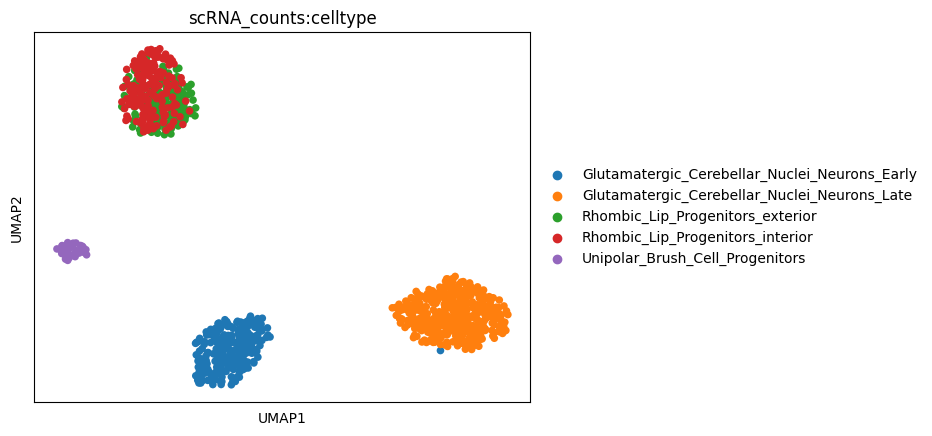

In [ ]:
sc.pl.umap(eRegulon_gene_AUC, color = "scRNA_counts:celltype")

## eRegulon specificity score
https://scenicplus.readthedocs.io/en/latest/human_cerebellum.html#eRegulon-specificity-score

In [ ]:
rss = regulon_specificity_scores(
    scplus_mudata = scplus_mdata,
    variable = "scRNA_counts:celltype",
    modalities = ["direct_gene_based_AUC", "extended_gene_based_AUC"]
)

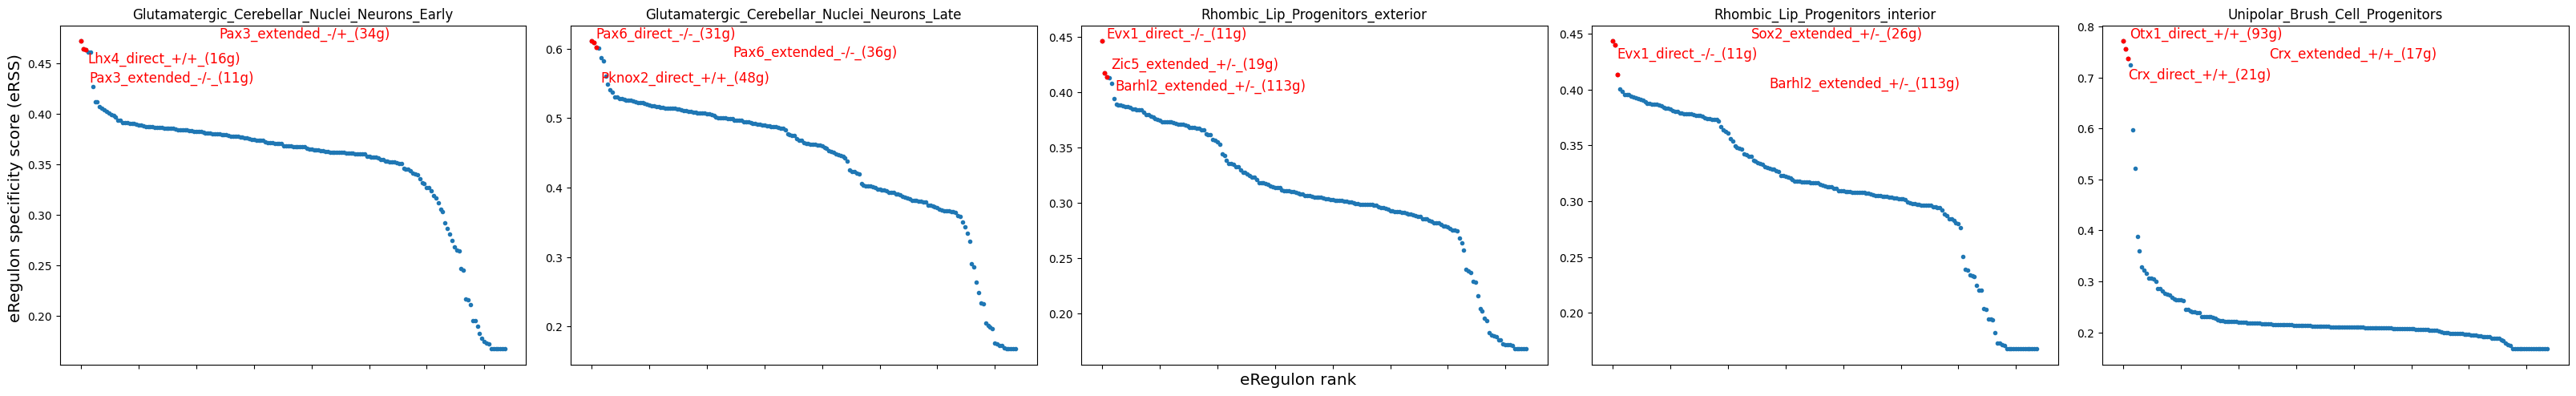

In [ ]:
plot_rss(
    data_matrix = rss,
    top_n = 3,
    num_columns = 5
)

### Plot eRegulon enrichment scores
eRegulon enrichment scores can be plotted on the UMAP


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


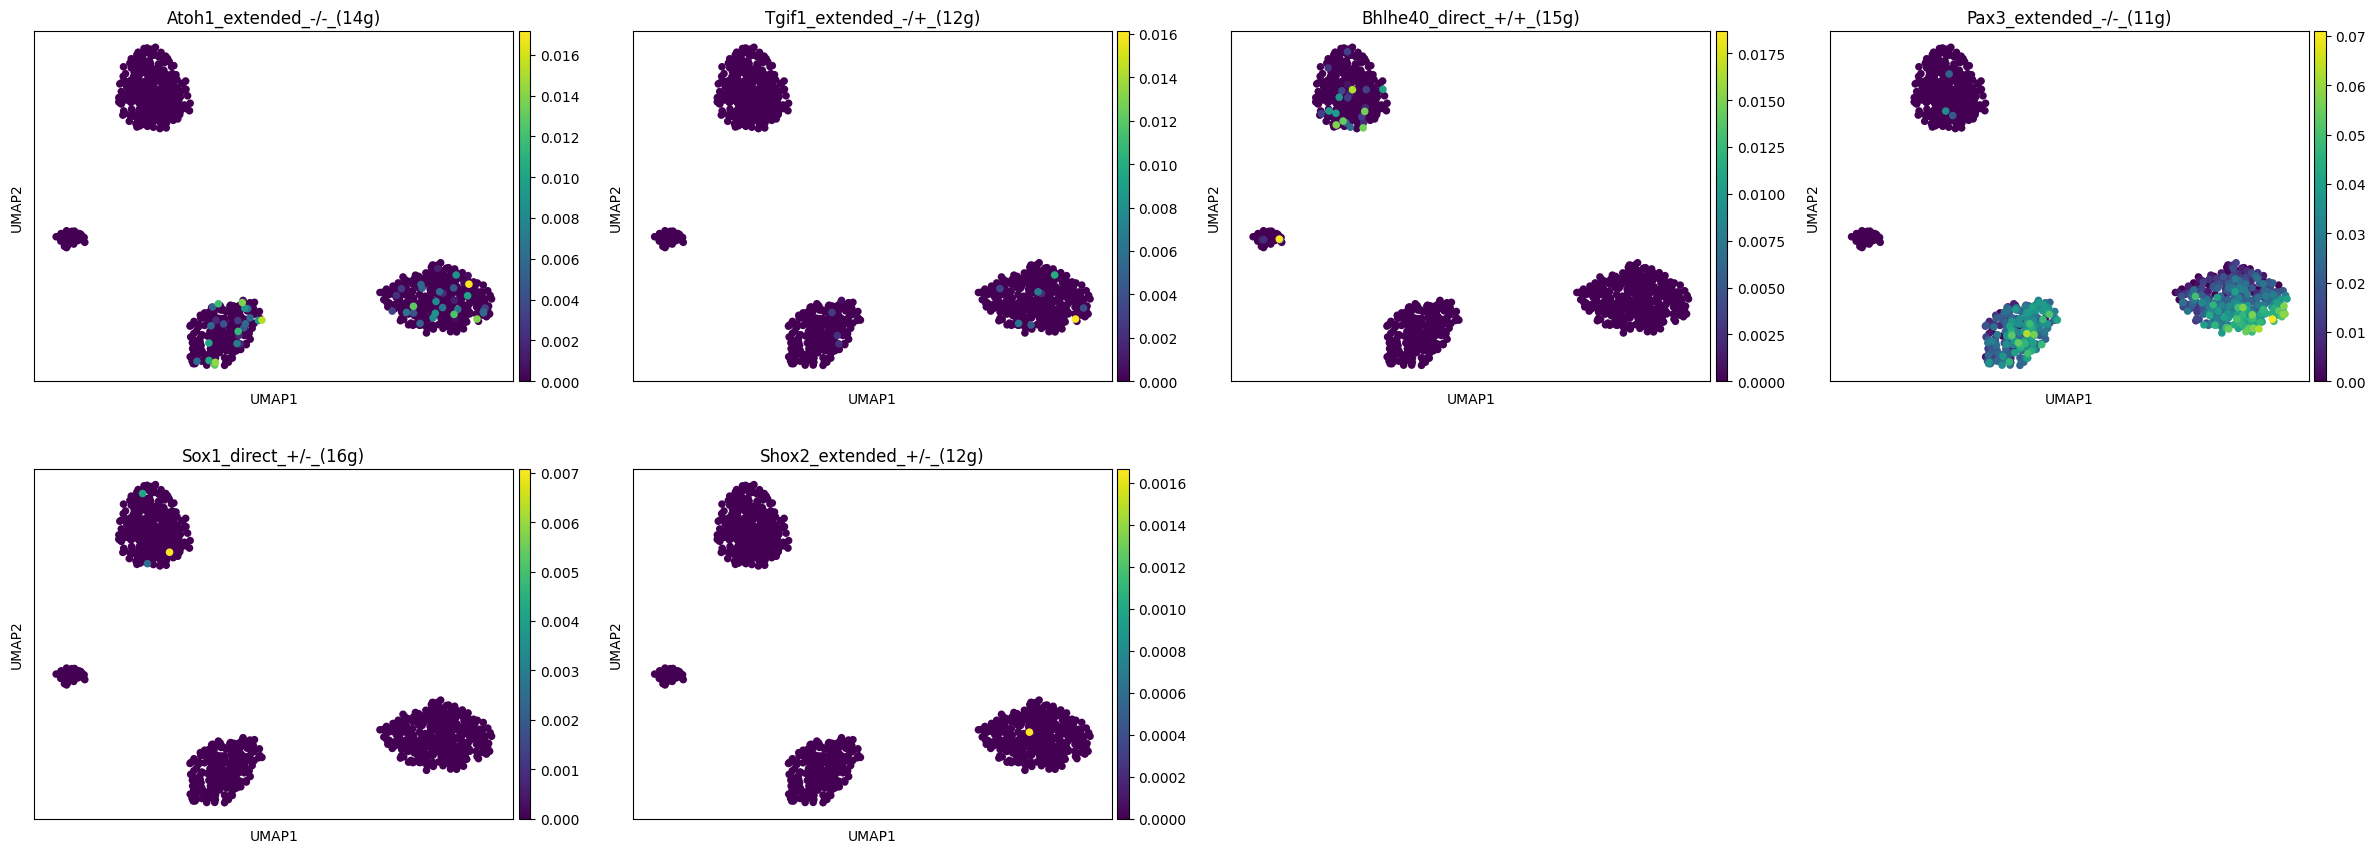

In [ ]:
sc.pl.umap(eRegulon_gene_AUC, color = list(set([x for xs in [rss.loc[ct].sort_values()[0:2].index for ct in rss.index] for x in xs])))

### Heatmap dotplot
Where colour represents target gene enrichment and dotsize represents target region enrichment.

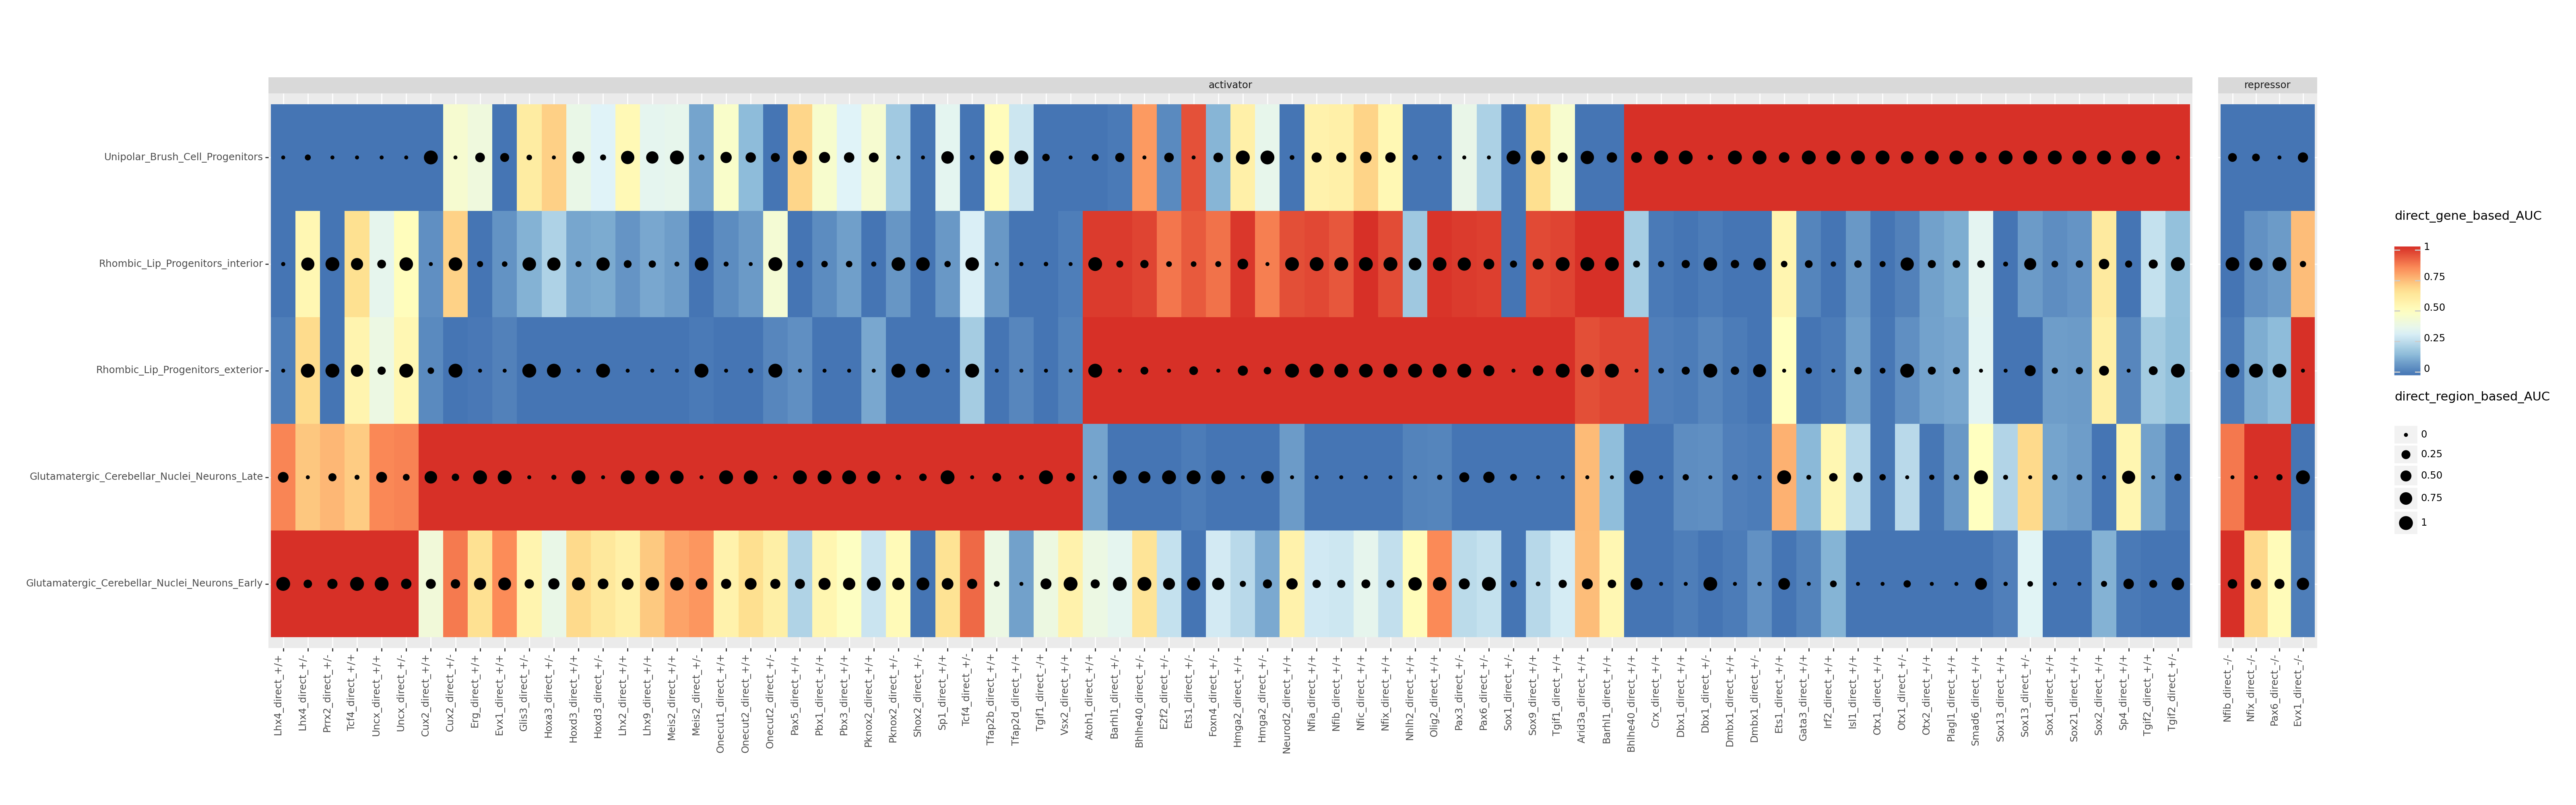

<Figure Size: (3200 x 1000)>

In [ ]:
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:celltype",
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "horizontal",
    figsize = (32, 10)
)

# Converting mudata to old SCENIC+ object
As of May 2024: "Not all functions in the original release of SCENIC+ are updated to use the new mudata output of SCENIC+. To be able to still use these old functions while they get updated we have a function to convert the mudata object the the old SCENIC+ object."
From [this section](https://scenicplus.readthedocs.io/en/latest/human_cerebellum.html#Converting-mudata-output-to-old-style-SCENIC+-object.) in their tutorial

In [ ]:
scplus_mdata = mudata.read(mudata_fname)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.


In [ ]:
scplus_obj = mudata_to_scenicplus(
    mdata = scplus_mdata,
    # path_to_cistarget_h5 = "outs/ctx_results.hdf5",
    # path_to_dem_h5 = "outs/dem_results.hdf5"
)

In [ ]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 1000 x 3000 and n_cells x n_regions = 1000 x 225458
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'celltype'